## 產生ArUco marker
下面範例產生ArUco marker影像，其中DICT_5X5_100表示Marker為5X5的黑白Bit-pattern，一共可有100個，編號0-99號。

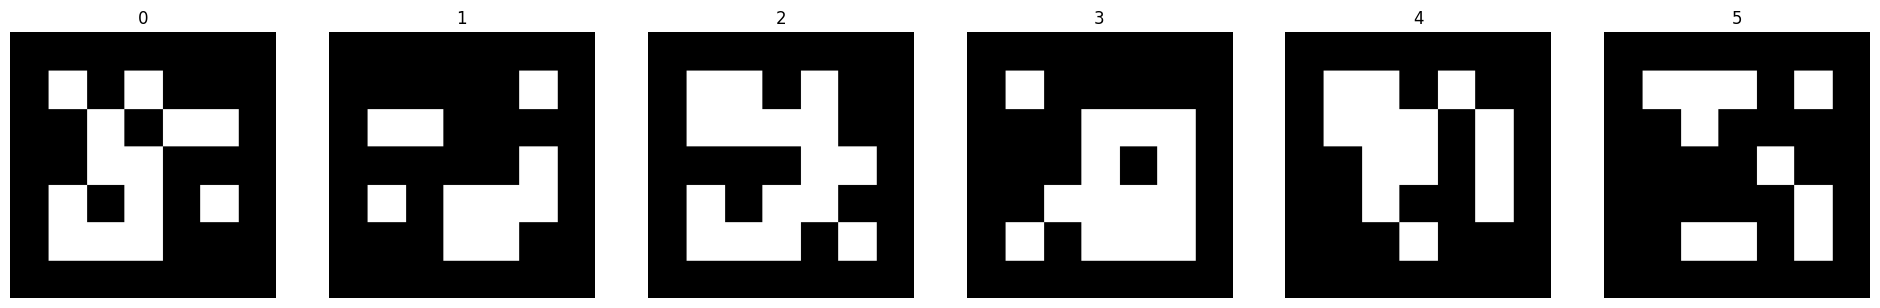

In [1]:
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt
arucoDict   = aruco.getPredefinedDictionary(aruco.DICT_5X5_100)
plt.figure(figsize=(24,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.title(i)    
    marker_image = aruco.drawMarker(arucoDict,i,200)
    plt.imshow(marker_image,cmap='gray')
    plt.axis(False)
plt.show()

下面範例產生ArUco marker影像，其中DICT_7X7_50表示Marker為7X7的黑白Bit-pattern，一共可有50個，編號0-49號。

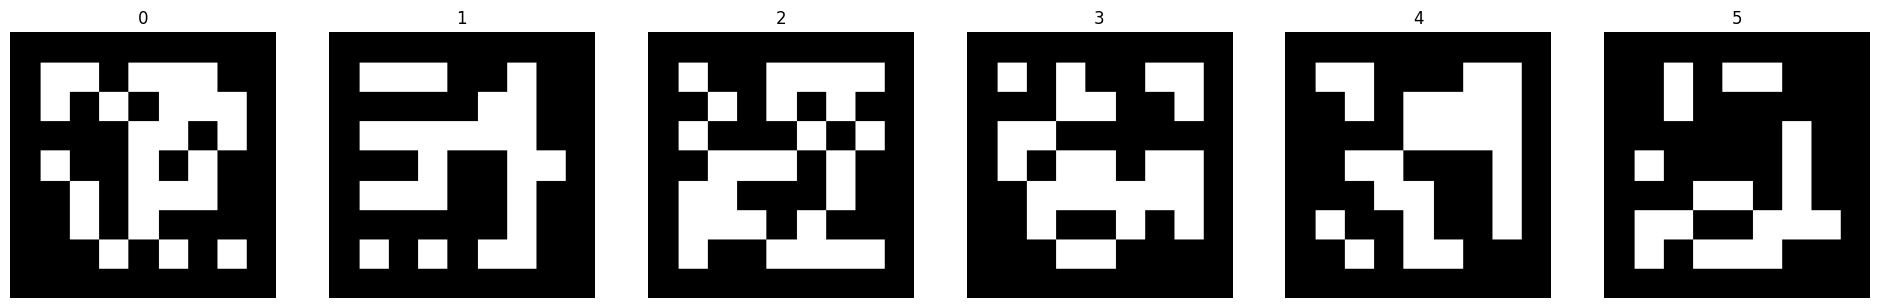

In [2]:
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt
arucoDict   = aruco.getPredefinedDictionary(aruco.DICT_7X7_50)

plt.figure(figsize=(24,4))
for i in range(0,6):
    plt.subplot(1,6,1+i)
    plt.title(i)    
    marker_image = aruco.drawMarker(arucoDict,i,200)
    plt.imshow(marker_image,cmap='gray')
    plt.axis(False)
plt.show()

到<a href="https://chev.me/arucogen/">這裡</a>或是用下面程式，產生特定尺寸(6cmX6cm)的ArUco Marker。

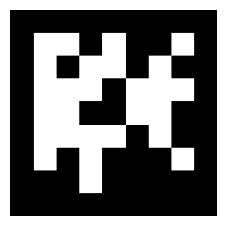

In [3]:
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt
arucoDict     = aruco.getPredefinedDictionary(aruco.DICT_7X7_50)
markerSize    = 6 # cm
markerId      = 6
plt.figure(figsize=(markerSize/2.54,markerSize/2.54))
marker_image = aruco.drawMarker(arucoDict,markerId,200)
plt.grid(False)
plt.axis(False)
plt.tight_layout()
plt.imshow(marker_image,cmap='gray')
plt.savefig('aruco_marker.svg')
plt.show()

### 產生ChArUco Marker
什麼是ChArUco board?詳細說明看<a href="https://docs.opencv.org/4.x/df/d4a/tutorial_charuco_detection.html">這裡</a>?
<img src="https://docs.opencv.org/4.x/charucodefinition.png" width="600px">

In [4]:
help(aruco.CharucoBoard_create)

Help on built-in function CharucoBoard_create:

CharucoBoard_create(...)
    CharucoBoard_create(squaresX, squaresY, squareLength, markerLength, dictionary) -> retval
    .   * @brief Create a CharucoBoard object
    .        *
    .        * @param squaresX number of chessboard squares in X direction
    .        * @param squaresY number of chessboard squares in Y direction
    .        * @param squareLength chessboard square side length (normally in meters)
    .        * @param markerLength marker side length (same unit than squareLength)
    .        * @param dictionary dictionary of markers indicating the type of markers.
    .        * The first markers in the dictionary are used to fill the white chessboard squares.
    .        * @return the output CharucoBoard object
    .        *
    .        * This functions creates a CharucoBoard object given the number of squares in each direction
    .        * and the size of the markers and chessboard squares.



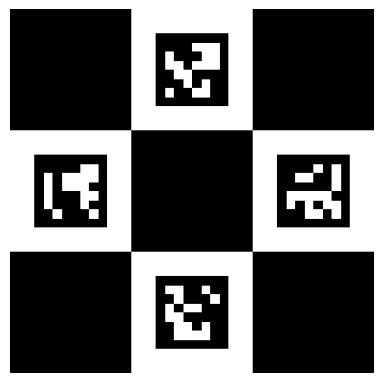

In [5]:
import numpy as np
arucoDict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
arucoIds  = np.array([13,29,47,97])
squareLength= 200
markerLength= 120
markerSize  = 10 # cm
charucoBoard = aruco.CharucoBoard_create(3,3,squareLength,markerLength,arucoDict)
markerImage = charucoBoard.draw((3*100,3*100),0,0) # Square 100x100 pixels
#markerImage = aruco.drawCharucoDiamond(arucoDict,arucoIds,squareLength,markerLength)
plt.figure(figsize=(markerSize/2.54,markerSize/2.54))
plt.axis(False)
plt.grid(False)
plt.tight_layout()
plt.imshow(markerImage,cmap='gray')
plt.savefig('ChArUco_marker.svg')
plt.show()

## 使用ChArUco或ArUco Marker做相機校正

### 產生ArUco Board。

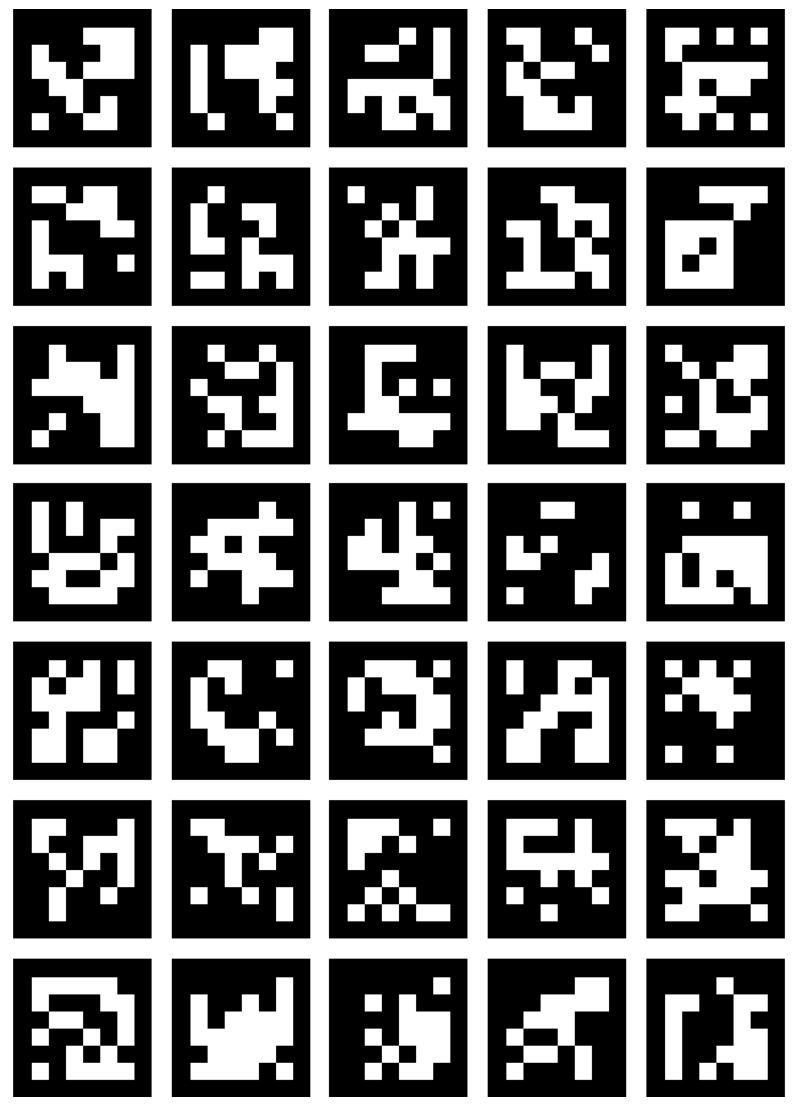

In [6]:
import numpy as np
arucoDict    = aruco.Dictionary_get(aruco.DICT_6X6_250)
gridX        = 5
gridY        = 7
markerSize   = 3.5 #cm
markerGap    = 0.5 #cm
arucoBoard   = aruco.GridBoard_create(gridX,gridY,markerSize,markerGap,arucoDict) # marker:3.5cmx3.5cm,間隔0.5cm
boardImage   = arucoBoard.draw((gridX*100,gridY*100),0,0) #5*100,7*100
boardHeight  = gridY*markerSize+(gridY+1)*markerGap #cm
boardWidth   = gridX*markerSize+(gridX+1)*markerGap
plt.figure(figsize=(boardWidth/2.54,boardHeight/2.54))
plt.grid(False)
plt.axis(False)
plt.tight_layout()
plt.imshow(boardImage,cmap='gray')
plt.savefig('ArUco_board.svg')
plt.show()

### 產生ChArUco Board。
根據官方說明，偵測ChArUco board比較準。

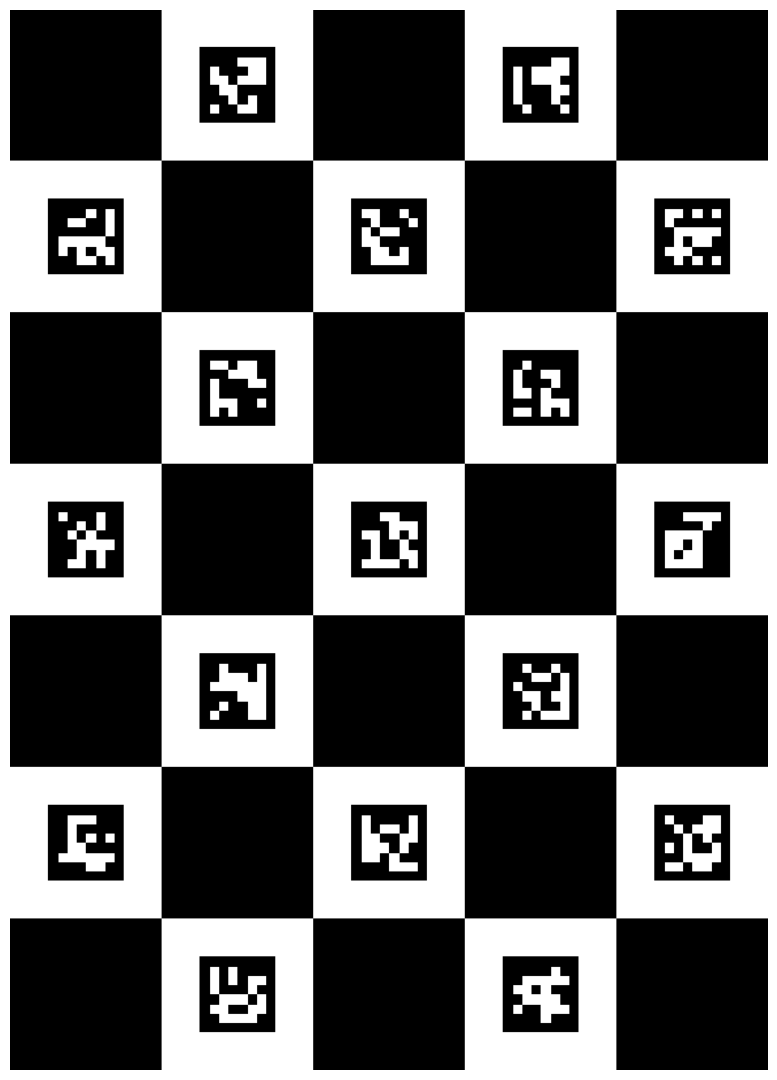

In [7]:
import numpy as np
arucoDict    = aruco.Dictionary_get(aruco.DICT_6X6_250)
gridX        = 5
gridY        = 7
squareSize   = 4 #cm
charucoBoard = aruco.CharucoBoard_create(gridX,gridY,squareSize,squareSize/2,arucoDict)
boardImage   = charucoBoard.draw((gridX*100,gridY*100),0,0) # Square 100x100 pixels
plt.figure(figsize=(gridX*squareSize/2.54,gridY*squareSize/2.54)) #Board 5*4cm X 7*4cm
plt.grid(False)
plt.axis(False)
plt.tight_layout()
plt.imshow(boardImage,cmap='gray')
plt.savefig('ChArUco_board.svg')
plt.show()

## 偵測ArUco Marker

使用前先準備有關aruco影像處理與marker編碼的參數。有必要，可以調整影像處理的參數arucoParams:
<code>
   arucoParams = aruco.DetectorParameters_create()
   arucoDict   = aruco.Dictionary_get(aruco.DICT_7X7_50)
</code>
然後呼叫偵測aruco marker函式:
<code>    
   (corners, ids, rejected) = aruco.detectMarkers(frame, arucoDict, parameters=arucoParams)
</code>
若要顯示偵測結果，可以呼叫drawDetectedMarkers
<code>
   aruco.drawDetectedMarkers(frame, corners, ids))        
</code>    
corners依照順時針排，但是沒說哪一個角是第一個點。

In [8]:
import cv2
import cv2.aruco as aruco

cap = cv2.VideoCapture('arUco_marker.mp4')
#原始畫面有點大，為了有利於顯示這份講義所以縮小。
frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))//2
frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))//2

arucoParams = aruco.DetectorParameters_create()
arucoDict   = aruco.Dictionary_get(aruco.DICT_7X7_50)

print('height {}, width {}'.format(cap.get(cv2.CAP_PROP_FRAME_HEIGHT),cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    frame = cv2.resize(frame,(frameWidth,frameHeight)) 
    (corners, ids, rejected) = aruco.detectMarkers(frame, arucoDict, parameters=arucoParams)    
    if len(corners) > 0:
        aruco.drawDetectedMarkers(frame, corners, ids)
        
    cv2.imshow('arUco marker',frame)
    if cv2.waitKey(20) != -1:
        break

cv2.destroyAllWindows()
cap.release()

height 1080.0, width 1920.0


## 使用未校正相機估計ChArUco Board姿態
相機內部參數用猜的。

In [9]:
dir(aruco)

['Board',
 'Board_create',
 'CCW_CENTER',
 'CCW_center',
 'CORNER_REFINE_APRILTAG',
 'CORNER_REFINE_CONTOUR',
 'CORNER_REFINE_NONE',
 'CORNER_REFINE_SUBPIX',
 'CW_TOP_LEFT_CORNER',
 'CW_top_left_corner',
 'CharucoBoard',
 'CharucoBoard_create',
 'DICT_4X4_100',
 'DICT_4X4_1000',
 'DICT_4X4_250',
 'DICT_4X4_50',
 'DICT_5X5_100',
 'DICT_5X5_1000',
 'DICT_5X5_250',
 'DICT_5X5_50',
 'DICT_6X6_100',
 'DICT_6X6_1000',
 'DICT_6X6_250',
 'DICT_6X6_50',
 'DICT_7X7_100',
 'DICT_7X7_1000',
 'DICT_7X7_250',
 'DICT_7X7_50',
 'DICT_APRILTAG_16H5',
 'DICT_APRILTAG_16h5',
 'DICT_APRILTAG_25H9',
 'DICT_APRILTAG_25h9',
 'DICT_APRILTAG_36H10',
 'DICT_APRILTAG_36H11',
 'DICT_APRILTAG_36h10',
 'DICT_APRILTAG_36h11',
 'DICT_ARUCO_ORIGINAL',
 'DetectorParameters',
 'DetectorParameters_create',
 'Dictionary',
 'Dictionary_create',
 'Dictionary_create_from',
 'Dictionary_get',
 'Dictionary_getBitsFromByteList',
 'Dictionary_getByteListFromBits',
 'EstimateParameters',
 'EstimateParameters_create',
 'GridBoard'

In [10]:
import cv2
import cv2.aruco as aruco

cap = cv2.VideoCapture('CharUco_board.mp4')
print('height {}, width {}'.format(cap.get(cv2.CAP_PROP_FRAME_HEIGHT),cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
#原始畫面有點大，為了有利於顯示這份講義所以縮小。    
totalFrame   = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))//2
frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))//2

arucoParams  = aruco.DetectorParameters_create()
arucoParams.cornerRefinementMethod = aruco.CORNER_REFINE_SUBPIX
arucoDict    = aruco.Dictionary_get(aruco.DICT_6X6_250)
gridX        = 5
gridY        = 7
squareSize   = 4 #cm
charucoBoard = aruco.CharucoBoard_create(gridX,gridY,squareSize,squareSize/2,arucoDict)
cameraMatrixInit = np.array([[ frameWidth/2.,    0., frameWidth/2.],[    0., frameWidth/2., frameHeight/2.],[    0.,    0.,           1.]])
distCoeffsInit   = np.zeros((5,1))

while True:
    ret, frame = cap.read()
    if not ret:
        break
           
    frame = cv2.resize(frame,(frameWidth,frameHeight)) 
    (corners, ids, rejected) = aruco.detectMarkers(frame, arucoDict, parameters=arucoParams)    
    
    if ids is not None and len(ids)>0:
        aruco.drawDetectedMarkers(frame, corners, ids)
        ret, rvect, tvect = aruco.estimatePoseBoard(corners, ids, charucoBoard, cameraMatrixInit, distCoeffsInit, None, None)
#         if ret:
#             aruco.drawAxis(frame, cameraMatrixInit, distCoeffsInit, rvect, tvect, squareSize)
        
    cv2.imshow('Estimation of the pose of a ChArUco board with inarrurate intrinic camera parameters',frame)
    if cv2.waitKey(20) != -1:
        break
        
cv2.destroyAllWindows()
cap.release()

height 1080.0, width 1920.0


### 使用ChArUco Board做相機校正

In [11]:
import cv2
import cv2.aruco as aruco

cap = cv2.VideoCapture('CharUco_board.mp4')
#原始畫面有點大，為了有利於顯示這份講義所以縮小。    
totalFrame   = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))//2
frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))//2

arucoParams  = aruco.DetectorParameters_create()
arucoParams.cornerRefinementMethod = aruco.CORNER_REFINE_SUBPIX

arucoDict    = aruco.Dictionary_get(aruco.DICT_6X6_250)

# 必須描述ChArUco board的尺寸規格
gridX        = 5 # 水平方向5格
gridY        = 7 # 垂直方向7格
squareSize   = 4 # 每格為4cmX4cm
# ArUco marker為2cmX2cm
charucoBoard = aruco.CharucoBoard_create(gridX,gridY,squareSize,squareSize/2,arucoDict)

print('height {}, width {}'.format(cap.get(cv2.CAP_PROP_FRAME_HEIGHT),cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
refinedStrategy = True
criteria        = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)
frameId        = 0
collectCorners = []
collectIds     = []
collectFrames  = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    frame = cv2.resize(frame,(frameWidth,frameHeight)) 
    (corners, ids, rejected) = aruco.detectMarkers(frame, arucoDict, parameters=arucoParams)    
    
    if refinedStrategy:
        corners, ids, _, _ = aruco.refineDetectedMarkers(frame,charucoBoard,corners,ids,rejected)
        
    if frameId % 100 == 50 and ids is not None and len(ids)==17: # 17 ArUco markers
        collectCorners.append(corners)
        collectIds.append(ids.ravel())
        collectFrames.append(frame)
        
    if len(corners) > 0:
        aruco.drawDetectedMarkers(frame, corners, ids)

    cv2.imshow('Analysis of a CharUco board for camera calibration',frame)
    if cv2.waitKey(20) != -1:
        break
        
    frameId += 1

cv2.destroyAllWindows()
cap.release()

height 1080.0, width 1920.0


### 先使用calibrateCameraAruco

In [12]:
caliCorners=np.concatenate([np.array(x).reshape(-1,4,2) for x in collectCorners],axis=0)
counter=np.array([len(x) for x in collectIds])
caliIds=np.array(collectIds).ravel()
cameraMatrixInit = np.array([[ 1000.,    0., frameWidth/2.],[    0., 1000., frameHeight/2.],[    0.,    0.,           1.]])
distCoeffsInit   = np.zeros((5,1))
ret, aruco_cameraMatrix, aruco_distCoeffs, aruco_rvects, aruco_tvects = aruco.calibrateCameraAruco(caliCorners,caliIds,counter,charucoBoard,(frameWidth,frameHeight),cameraMatrixInit,distCoeffsInit)
print(aruco_cameraMatrix)
print(aruco_distCoeffs)
# print(aruco_rvects)
# print(aruco_tvects)

[[913.8106975    0.         479.55867775]
 [  0.         921.09144892 293.00946535]
 [  0.           0.           1.        ]]
[[ 0.06739157]
 [-0.11176168]
 [-0.00446193]
 [-0.00266387]
 [-0.01974242]]


### 接續使用calibriateCameraChAruco

In [13]:
caliCorners=[]
caliIds    =[]
for corners, ids, frame in zip(collectCorners,collectIds,collectFrames):
    ret, charucoCorners, charucoIds = aruco.interpolateCornersCharuco(corners,ids,frame,charucoBoard,aruco_cameraMatrix,aruco_distCoeffs)
    caliCorners.append(charucoCorners)
    caliIds.append(charucoIds)

ret, charuco_cameraMatrix, charuco_distCoeffs, charuco_rvects, charuco_tvects = aruco.calibrateCameraCharuco(caliCorners,caliIds,charucoBoard,(frameWidth,frameHeight), aruco_cameraMatrix,aruco_distCoeffs)    
print(charuco_cameraMatrix)
print(charuco_distCoeffs)
# print(charuco_rvects)
# print(charuco_tvects)

[[888.25445081   0.         482.34262729]
 [  0.         896.25259096 305.57037135]
 [  0.           0.           1.        ]]
[[ 0.08518852]
 [-0.41241413]
 [-0.0023548 ]
 [-0.00228344]
 [ 1.08101268]]


### 使用校正的相機估計ChArUco Board姿態

In [14]:
import cv2
import cv2.aruco as aruco

cap = cv2.VideoCapture('CharUco_board.mp4')
print('height {}, width {}'.format(cap.get(cv2.CAP_PROP_FRAME_HEIGHT),cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

#原始畫面有點大，為了有利於顯示這份講義所以縮小。    
totalFrame   = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))//2
frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))//2

arucoParams  = aruco.DetectorParameters_create()
arucoParams.cornerRefinementMethod = aruco.CORNER_REFINE_SUBPIX
arucoDict    = aruco.Dictionary_get(aruco.DICT_6X6_250)
gridX        = 5
gridY        = 7
squareSize   = 4 #cm
charucoBoard = aruco.CharucoBoard_create(gridX,gridY,squareSize,squareSize/2,arucoDict)

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    frame = cv2.resize(frame,(frameWidth,frameHeight)) 
    (corners, ids, rejected) = aruco.detectMarkers(frame, arucoDict, parameters=arucoParams)    
    
    if ids is not None and len(ids)>0:
        aruco.drawDetectedMarkers(frame, corners, ids)
        ret, rvect, tvect = aruco.estimatePoseBoard(corners, ids, charucoBoard, charuco_cameraMatrix, charuco_distCoeffs, None, None)
#         if ret:
#             aruco.drawAxis(frame, charuco_cameraMatrix, charuco_distCoeffs, rvect, tvect, squareSize)
        
    cv2.imshow('Estimation of the pose of a CharUco board with intrinsic camera parameters',frame)
    if cv2.waitKey(20) != -1:
        break
        
cv2.destroyAllWindows()
cap.release()

height 1080.0, width 1920.0


### 估計Marker姿態

In [15]:
import cv2
import cv2.aruco as aruco

cap = cv2.VideoCapture('arUco_marker.mp4')
markerSize  = 6 #6cm

#原始畫面有點大，為了有利於顯示這份講義所以縮小。    
frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))//2
frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))//2

arucoParams = aruco.DetectorParameters_create()
arucoParams.cornerRefinementMethod = aruco.CORNER_REFINE_SUBPIX
arucoDict   = aruco.Dictionary_get(aruco.DICT_7X7_50)

print('height {}, width {}'.format(cap.get(cv2.CAP_PROP_FRAME_HEIGHT),cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

while True:
    ret, frame = cap.read()
    if not ret:
        break
           
    frame = cv2.resize(frame,(frameWidth,frameHeight)) 
    (corners, ids, rejected) = aruco.detectMarkers(frame, arucoDict, parameters=arucoParams)    
    if len(corners) > 0:
        aruco.drawDetectedMarkers(frame, corners, ids)
        rvects, tvects, _ = aruco.estimatePoseSingleMarkers(corners, markerSize, charuco_cameraMatrix, charuco_distCoeffs)
#         for rvec,tvec in zip(rvects,tvects):
#             aruco.drawAxis(frame, charuco_cameraMatrix, charuco_distCoeffs, rvec, tvec, markerSize/2)
        
    cv2.imshow('Estimation of the pose of arUco marker with intrinsic camera parameters',frame)
    if cv2.waitKey(20) != -1:
        break

cv2.destroyAllWindows()
cap.release()

height 1080.0, width 1920.0


## 世界座標系統$\Rightarrow$影像座標系統
將Marker的4角點透過projectPoints計算其影像座標。

In [16]:
import cv2
import cv2.aruco as aruco

cap = cv2.VideoCapture('arUco_marker.mp4')
markerSize  = 6 #6cm

#原始畫面有點大，為了有利於顯示這份講義所以縮小。    
frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))//2
frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))//2

arucoParams = aruco.DetectorParameters_create()
arucoParams.cornerRefinementMethod = aruco.CORNER_REFINE_SUBPIX
arucoDict   = aruco.Dictionary_get(aruco.DICT_7X7_50)

print('height {}, width {}'.format(cap.get(cv2.CAP_PROP_FRAME_HEIGHT),cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
markerCorners3D = np.array([[3,3,0],[-3,3,0],[-3,-3,0],[3,-3,0]],dtype=float)
while True:
    ret, frame = cap.read()
    if not ret:
        break
           
    frame = cv2.resize(frame,(frameWidth,frameHeight)) 
    (corners, ids, rejected) = aruco.detectMarkers(frame, arucoDict, parameters=arucoParams)    
    if len(corners) > 0:
        aruco.drawDetectedMarkers(frame, corners, ids)
        for corner in corners:
            for pt in corner[0]:
                cv2.drawMarker(frame,tuple(pt.astype(int).ravel()),(0,0,255),cv2.MARKER_CROSS,20,2)
        
        rvects, tvects, _ = aruco.estimatePoseSingleMarkers(corners, markerSize, charuco_cameraMatrix, charuco_distCoeffs)

        
        for rvec,tvec in zip(rvects,tvects):
            proj_pt_with_dist,_ = cv2.projectPoints(markerCorners3D, rvec, tvec, charuco_cameraMatrix, charuco_distCoeffs)
#             aruco.drawAxis(frame, charuco_cameraMatrix, charuco_distCoeffs, rvec, tvec, markerSize/2)
            for pt in proj_pt_with_dist:
                cv2.drawMarker(frame,tuple(pt.astype(int).ravel()),(0,255,0),cv2.MARKER_CROSS,10,2)
        
    cv2.imshow('Estimation of the pose of arUco marker with intrinsic camera parameters',frame)
    if cv2.waitKey(20) != -1:
        break

cv2.destroyAllWindows()
cap.release()

height 1080.0, width 1920.0
